# Clasificador de imagenes por medio de redes neuronales no convolucionales

<div style='display: flex:'>
<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width=500>
</div>

# 0. Librerias a usar

In [1]:
# Usage of tensorflow is only for data importation pourposes
import tensorflow as tf
import tensorflow_datasets as tfds

# Needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

# 1. Entendimiento del negocio


## 1.1. Descripción del problema:

En este proyecto, abordamos el desafío de clasificar imágenes de prendas de vestir utilizando el conjunto de datos FASHION MNIST. El problema principal radica en desarrollar un modelo de aprendizaje automático capaz de reconocer y categorizar diferentes tipos de prendas, como camisetas, pantalones, zapatos y otros artículos de moda en imágenes en blanco y negro. Este proceso de clasificación es fundamental para diversas aplicaciones, desde la recomendación de moda en línea hasta la optimización de inventarios en tiendas minoristas. El objetivo principal es lograr una clasificación precisa de las prendas de vestir, lo que permitirá mejorar la experiencia del cliente y proporcionar un valor significativo al negocio

## 1.2. Objetivo general:
Los objetivo principal de este proyecto es entrenar un modelo de clasificación de imágenes para el conjunto de datos FASHION MNIST.


## 1.4. Objetivos especificos:
* Desarrollar un modelo de clasificación de imágenes con una precisión del 90% en el conjunto de datos FASHION MNIST.
* Crear una API que permita a los usuarios cargar imágenes de prendas de vestir y recibir predicciones sobre su tipo.

# 2. Entendimiento de los datos:

## 2.1. Sobre el conjunto de datos

* Contexto:

    Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de prueba de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28 píxeles, asociada a una etiqueta de una de las 10 clases.
    Zalando ha creado Fashion-MNIST como un reemplazo directo del conjunto de datos MNIST original para evaluar algoritmos de aprendizaje automático. Comparte el mismo tamaño de imagen y la estructura de divisiones para entrenamiento y prueba.

    El conjunto de datos MNIST original contiene principalmente dígitos escritos a mano y es muy apreciado por la comunidad de Inteligencia Artificial/Aprendizaje Automático/Ciencia de Datos, que lo utiliza como referencia para validar sus algoritmos. De hecho, MNIST es a menudo el primer conjunto de datos que prueban los investigadores. Se dice que: "Si no funciona en MNIST, no funcionará en absoluto"

* Contexto

    Cada imagen tiene una altura y ancho de 28 píxeles, lo que suma un total de 784 píxeles. Cada píxel tiene un solo valor asociado que indica la luminosidad u oscuridad del píxel, donde números más altos representan mayor oscuridad. Este valor del píxel es un número entero que varía de 0 a 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas en total. La primera columna contiene las etiquetas de clase que representan la prenda de vestir. Las columnas restantes contienen los valores de píxeles asociados a la imagen correspondiente.

* Labels:

    Cada uno de los ejemplos de entrenamiento y prueba esta asignados a uno de estas etiquetas:
    *  0 -> T-shirt/top
    * 1 -> Trouser
    * 2 -> Pullover
    * 3 -> Dress
    * 4 -> Coat
    * 5 -> Sandal
    * 6 -> Shirt
    * 7 -> Sneaker
    * 8 -> Bag
    * 9 -> Ankle boot



## 2.2. Exploración de los datos:

Primero descargamos los data sets con las imagenes para entrenamiento y prueba

In [2]:
# Gets the train data
!gdown --id 1NK6LPiZ_4Ybwda8LRQKK356bPV6dZ_1y

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1NK6LPiZ_4Ybwda8LRQKK356bPV6dZ_1y 



In [3]:
# Gets the test data
!gdown --id 1RpqAB4q16IcOrZJ4y9zHbGTrTT8Sbxyc

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1RpqAB4q16IcOrZJ4y9zHbGTrTT8Sbxyc 



Seguido de estos se cargan al notebooks como objetos DataFrame de pandas

In [4]:
train = pd.read_csv('fashion-mnist_train.csv')
train.head(3)

FileNotFoundError: ignored

In [ ]:
test = pd.read_csv('fashion-mnist_test.csv')
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


Como podemos ver son arreglos de: $n*785$. La primera columna corresponde a la clase de la imagenes y lo siguen 784 pixeles que corresponde a imagenes de $28*28$ en escala de gris (valores entre 0 y 255)

In [ ]:
# Every image size is 28x28 px and every pixel has a value between 0 and 255 (gray scale)
28*28

784

Cada numero entre 0 y 9 esta asociado a una de las siguientes etiquetas como se muestra a continuación:

In [ ]:
# Class names
class_names = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot',}

Imprimimos algunas de las imagenes

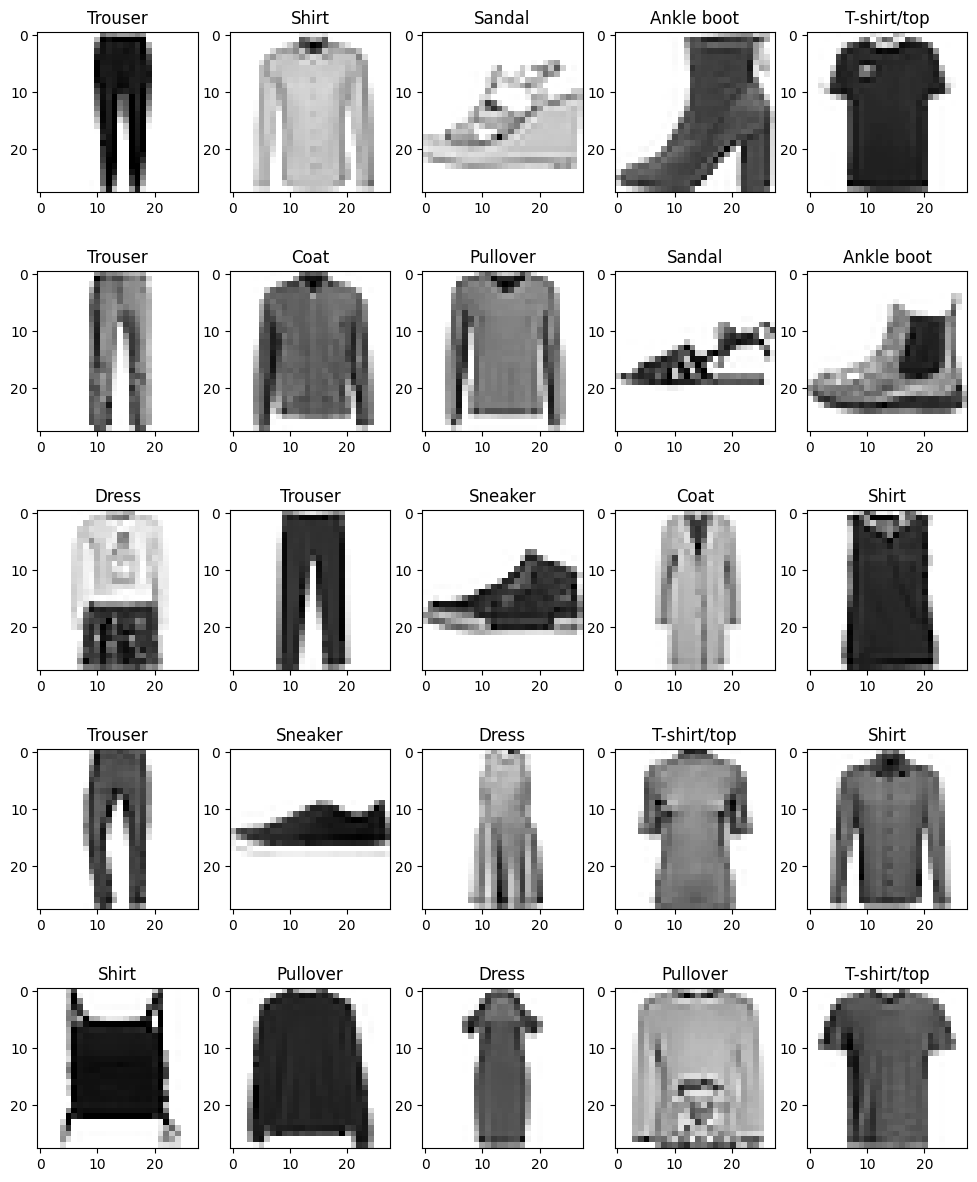

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12, 15))

for i in range(25):
    img_arr = train.sample(1).values.reshape(785)
    label = img_arr[0]
    pixels = img_arr[1:]
    row = i // 5
    column = i % 5
    axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[row, column].set_title(class_names[label])


In [ ]:
(
    train
    .label
    .replace(class_names)
    .value_counts()
)

Pullover       6000
Ankle boot     6000
Shirt          6000
T-shirt/top    6000
Dress          6000
Coat           6000
Sandal         6000
Bag            6000
Sneaker        6000
Trouser        6000
Name: label, dtype: int64

In [ ]:
(
    test
    .label
    .replace(class_names)
    .value_counts()
)

T-shirt/top    1000
Trouser        1000
Pullover       1000
Dress          1000
Bag            1000
Shirt          1000
Sandal         1000
Coat           1000
Sneaker        1000
Ankle boot     1000
Name: label, dtype: int64

# 3. Preparación de los datos

Se plantea un problema de aprendizaje supervisado, por esta razón vamos a separar los DataFrame de prueba y entrenamiento en sus respectivas etiquetas y caracteristicas.

In [ ]:
# X and y from train dataframe
X_train = train.drop('label', axis=1)
y_train = train.label

# X and y from test dataframe
X_test = test.drop('label', axis=1)
y_test = test.label

In [ ]:
print('Tamaño features de train: ', X_train.shape)
print('Tamaño labels de train ', y_train.shape)
print('Tamaño features de test: ', X_test.shape)
print('Tamaño labels de test: ', y_test.shape)

Tamaño features de train:  (60000, 784)
Tamaño labels de train  (60000,)
Tamaño features de test:  (10000, 784)
Tamaño labels de test:  (10000,)


Es recomendable normalizar los valores de píxeles al entrenar algoritmos de clasificación de imágenes. La normalización ayuda a estabilizar el entrenamiento, mejorar la generalización y prevenir el sobreajuste al ajustar los valores de píxeles en un rango específico. Tomamos cada pixel y llevamos su respectivo valor a un rango [0, 1]

In [ ]:
# Normalize data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test))

Observamos nuestros datos normalizados

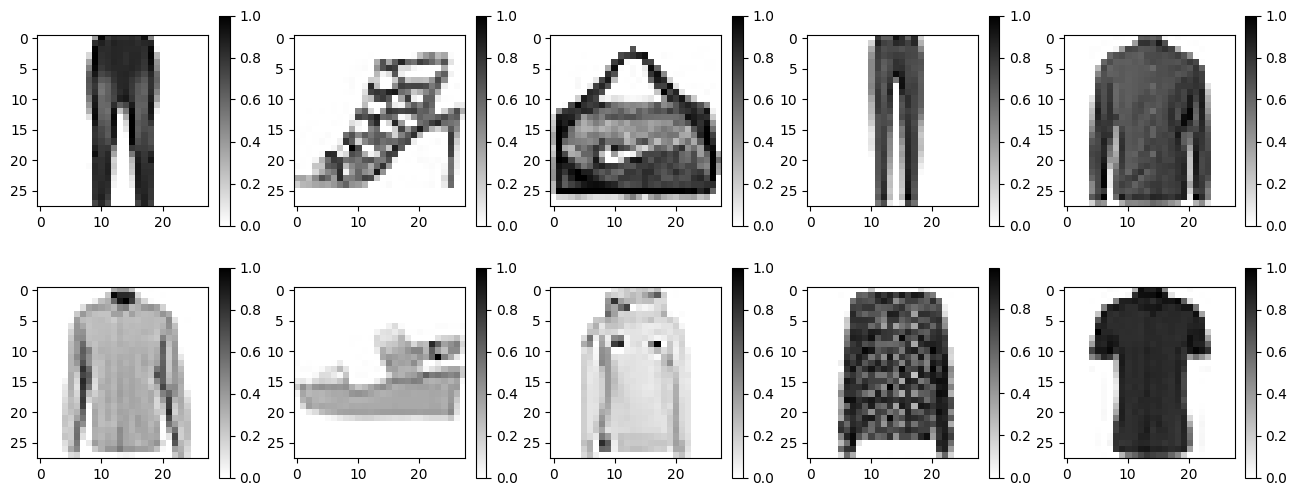

In [ ]:
# Show normalized data
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

for i in range(10):
    pixels = X_train_norm.sample(1).values.reshape(784)

    row = i // 5
    column = i % 5

    im = axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    fig.colorbar(im, ax = axes[row, column])

Por ultimo, se realizará una reducción de la dimensionalidad de los datos por medio de PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_norm)

[Text(0.5, 0, 'Componente'), Text(0, 0.5, 'Varianza Acumulada')]

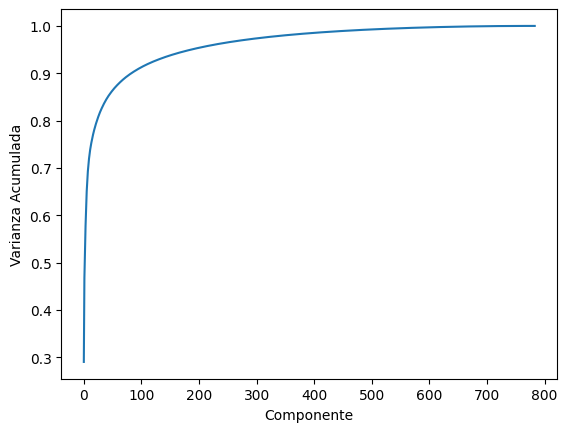

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Componente', ylabel='Varianza Acumulada')

Se observa que con al rededor de 200 componentes puedo explicar el 95% de mis datos. Obtengamos este resultado de forma precisa:

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = (cumulative_variance < 0.95).sum() + 1
n_components

188

In [ ]:
pca = PCA(n_components=n_components).fit(X_train_norm)

In [ ]:
X_train_t = pca.transform(X_train_norm)
X_train_r = pca.inverse_transform(X_train_t)

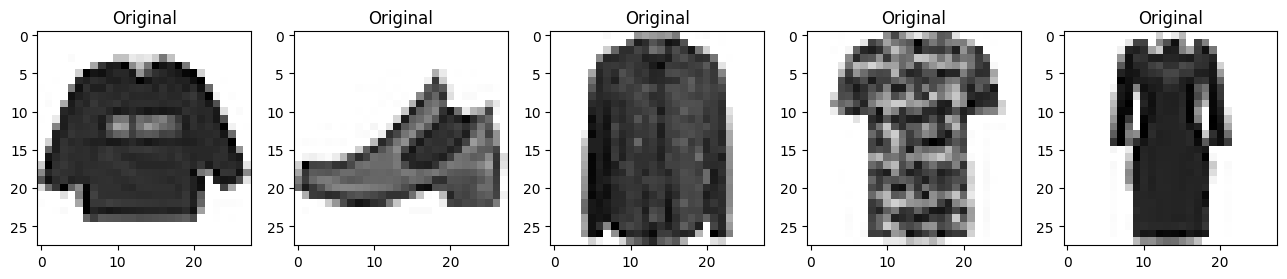

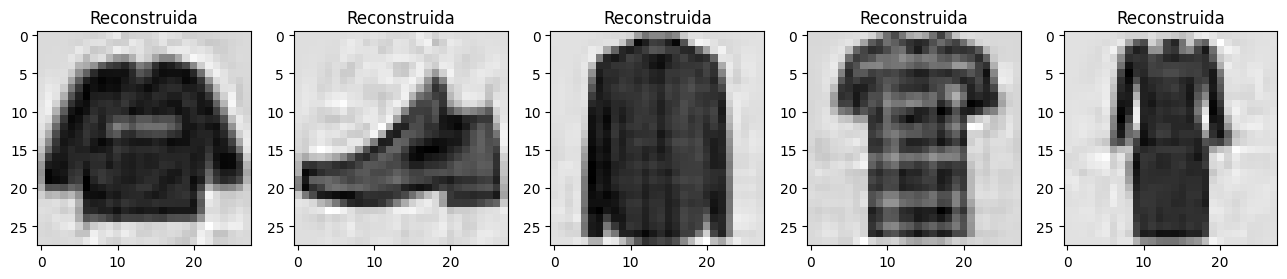

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_norm.values[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Original')

fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_r[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Reconstruida')

# 4. Modelamiento

## 4.1. KNN

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

Para obtener los mejores resultados se usará un grid search para explorar los parametros que mejor se ajusten a los datos y a este modelo.

In [ ]:
# params = {
#     'n_neighbors': np.arange(2, 20, 2),
#     'metric': ['euclidean', 'manhattan']
# }

In [ ]:
# knn = neighbors.KNeighborsClassifier()

# grid_search = GridSearchCV(knn, params, cv=6)

# grid_search.fit(X_train_r, y_train)

## 2.2 Decission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Función para visualizar la curva de aprendizaje a partir
# del error de entrenamiento y de generalización.
def plot_learning_curve(train_error, generalization_error):
  n = len(train_error)
  if len(train_error) != len(generalization_error):
    print("Las secuencias de error de entrenamiento y generalización deben tener el mismo tamaño.")
    return

  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, n + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, n + 1), generalization_error, label="Generalización")
  plt.xticks(range(0, n + 1, 2))
  plt.xlabel("Profundidad máxima")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim()
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

In [ ]:
classifier_image =  DecisionTreeClassifier()
classifier_image = classifier_image.fit(X_train_r, y_train)

In [ ]:
classifier_image_1 =  DecisionTreeClassifier(random_state=2, max_depth=12, min_impurity_decrease=0.001, criterion= 'entropy',min_samples_split=100,
                                             splitter="random")
classifier_image_1 = classifier_image_1.fit(X_train, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_1.score(X_train, y_train)}')
print(f'Error de prueba: {1 - classifier_image_1.score(X_test, y_test)}')

Error de entrenamiento: 0.2012666666666667
Error de prueba: 0.20489999999999997


In [ ]:
, criterion= 'entropy'   min_samples_leaf=6

In [ ]:
classifier_image_2 =  DecisionTreeClassifier( max_depth=12, min_impurity_decrease=0.0001, criterion= 'entropy',
                                            min_samples_leaf=8)
classifier_image_2 = classifier_image_2.fit(X_train, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test, y_test)}')

Error de entrenamiento: 0.12403333333333333
Error de prueba: 0.17859999999999998


### 2.2.2 Entrenamiento de clasificador tomando X_train_r y y_train

In [ ]:
pca = PCA(n_components=n_components).fit(X_test_norm)

In [ ]:
X_test_t = pca.transform(X_test_norm)
X_test_r = pca.inverse_transform(X_test_t)

In [ ]:
classifier_image_2 =  DecisionTreeClassifier( max_depth=11, min_impurity_decrease=0.001, criterion= 'entropy')
classifier_image_2 = classifier_image_2.fit(X_train_r, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_2.score(X_train_r, y_train)}')
print(f'Error de prueba: {1 - classifier_image_2.score(X_test_r, y_test)}')

Error de entrenamiento: 0.18984999999999996
Error de prueba: 0.20930000000000004


### 2.2.2 Entrenamiento de clasificador con X normalizado

In [ ]:
classifier_image_3 =  DecisionTreeClassifier( max_depth=12, min_impurity_decrease=0.0001, criterion= 'entropy')
classifier_image_3 = classifier_image_3.fit(X_train_norm, y_train)

In [ ]:
print(f'Error de entrenamiento: {1 - classifier_image_3.score(X_train_norm, y_train)}')
print(f'Error de prueba: {1 - classifier_image_3.score(X_test_norm, y_test)}')

Error de entrenamiento: 0.10834999999999995
Error de prueba: 0.18069999999999997


In [ ]:
# # Números enteros de 1 a 20 como posibles valores del hiperparámetro de profundidad.
# max_depth_values = np.arange(1, 21, 1)

# # Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
# train_error = np.empty(len(max_depth_values))
# generalization_error = np.empty(len(max_depth_values))


# for depth in max_depth_values:
#     # Entrenamos un árbol de decisión para cada valor de profundidad.
#     decision_tree = DecisionTreeClassifier(max_depth=depth)
#     decision_tree.fit(X_train, y_train)

#     # Almacenamos el error de entrenamiento y de generalización por cada árbol.
#     train_error[depth - 1] = (1 - decision_tree.score(X_train, y_train))
#     generalization_error[depth - 1] = (1 - decision_tree.score(X_test, y_test))

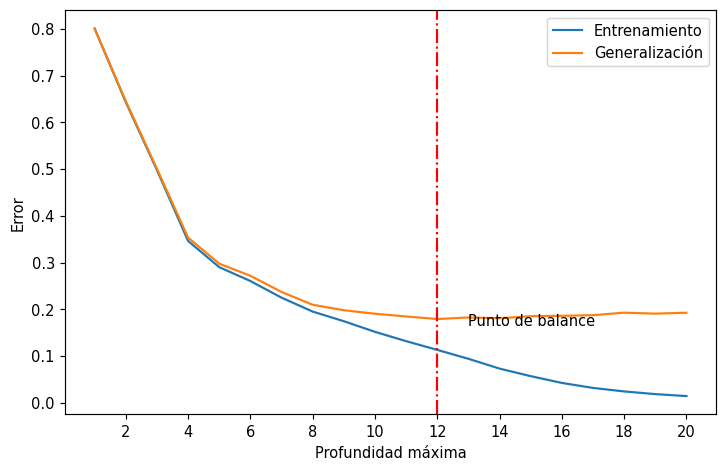

In [ ]:
# plot_learning_curve(train_error, generalization_error)

In [ ]:
# # Números enteros de 1 a 20 como posibles valores del hiperparámetro de profundidad.
# max_depth_values = np.arange(1, 21, 1)

# # Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
# train_error = np.empty(len(max_depth_values))
# generalization_error = np.empty(len(max_depth_values))


# for depth in max_depth_values:
#     # Entrenamos un árbol de decisión para cada valor de profundidad.
#     decision_tree = DecisionTreeClassifier(max_depth=depth)
#     decision_tree.fit(X_train_r, y_train)

#     # Almacenamos el error de entrenamiento y de generalización por cada árbol.
#     train_error[depth - 1] = (1 - decision_tree.score(X_train_r, y_train))
#     generalization_error[depth - 1] = (1 - decision_tree.score(X_test_r, y_test))

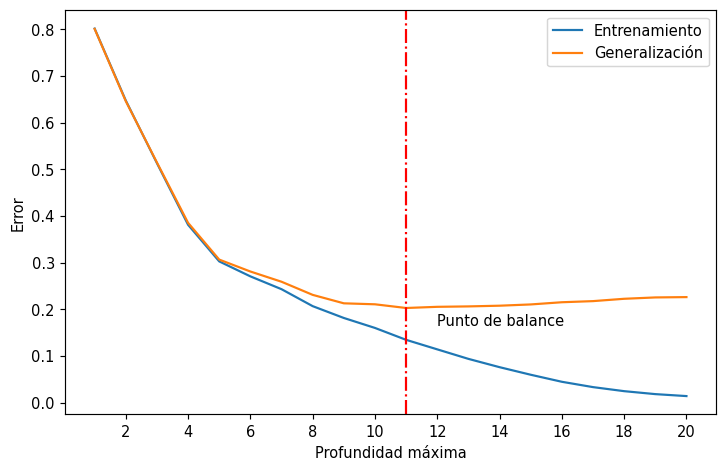

In [ ]:
# plot_learning_curve(train_error, generalization_error)

### 2.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)


In [ ]:
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


Precisión: 0.8768


## 2.4 Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Clasificador para el conjunto moons
NN_classifier = MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(100, 50),
                    learning_rate='constant', # Tipo de tasa de aprendizaje.
                    learning_rate_init=0.001, )# Tasa de aprendizaje inicial.) # Número de neuronas por cada capa oculta.

In [ ]:
NN_classifier.fit(X_train, y_train)
print(NN_classifier.score(X_test, y_test))

0.8797


In [ ]:
# Clasificador para el conjunto moons
NN_classifier_2 = MLPClassifier(solver='adam',
                    activation='relu',    # Función de activación. En este caso se usa la función tangente hiperbólica, con valores entre -1 y 1.
                    max_iter=1000,        # Cantidad máxima de iteraciones permitidas
                    #tol=1e-4, # Tolerancia de la optimización. Si en una iteración no mejora el modelo por esta cantidad (score) se detiene la ejecución.
                    hidden_layer_sizes=(150,150),
                    learning_rate='adaptive',
                    # learning_rate='constant',
                    # learning_rate_init=0.001,
                    early_stopping = True,
                    alpha=0.01,
                    # batch_size = 128 ,        # Tipo de tasa de aprendizaje.
                    # learning_rate_init=0.001, # Tasa de aprendizaje inicial.) # Número de neuronas por cada capa oculta.
                    )

In [ ]:
NN_classifier_2.fit(X_train, y_train)
print(NN_classifier_2.score(X_test, y_test))